In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [73]:
#reading data
X_2d = np.loadtxt("data/data_2d.csv", delimiter=',')
X_2d = X_2d[:, 1:]
X_mnist = np.loadtxt("data/mnist.csv", delimiter=',')

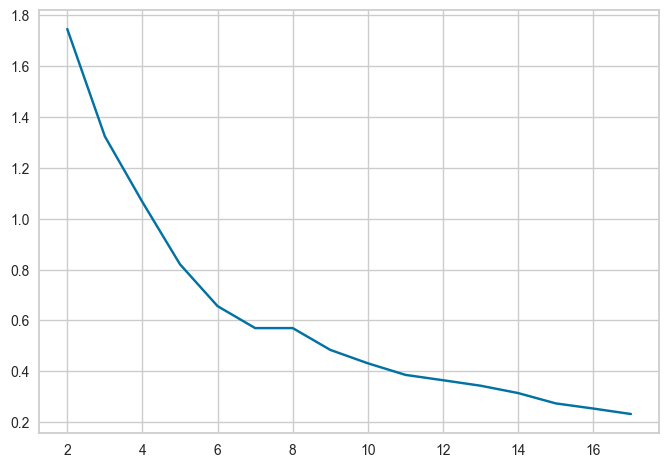

In [74]:
#finding optimal number of clusters for 2d
distortions = []
numbers_of_clusters = range(2, 18)
for i in numbers_of_clusters:
    model = KMeans(n_clusters=i, n_init='auto').fit(X_2d)
    distortions.append(model.inertia_ / X_2d.shape[0])
plt.plot(numbers_of_clusters, distortions)
plt.show()
#6 or 7. I'll go with 6
n_clusters_2d = 6

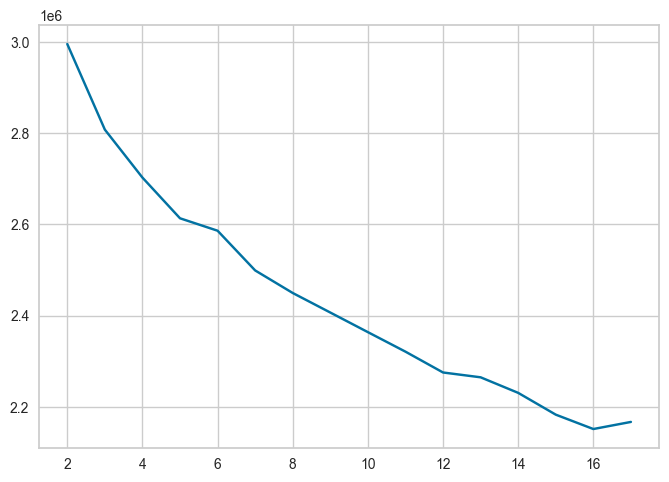

In [75]:
#finding optimal number of clusters for mnist
distortions = []
for i in numbers_of_clusters:
    model = KMeans(n_clusters=i, n_init='auto').fit(X_mnist)
    distortions.append(model.inertia_ / X_mnist.shape[0])
plt.plot(numbers_of_clusters, distortions)
plt.show()
#inconclusive... It changes every time. And most times the plot has multiple "elbows"
#I saw an elbow at number as low as 4 and as high as 15.
n_clusters_mnist = 6

In [76]:
#training models
model_2d = KMeans(n_clusters=n_clusters_2d, n_init='auto').fit(X_2d)
model_mnist = KMeans(n_clusters=n_clusters_mnist, n_init='auto').fit(X_mnist)

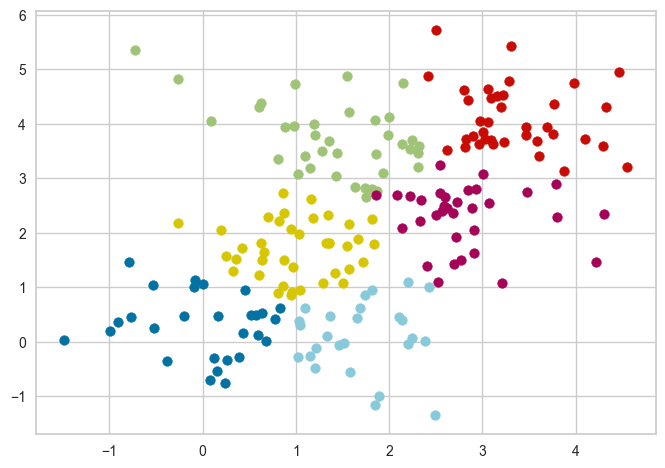

In [77]:
#plotting 2d
labels_2d = model_2d.predict(X_2d)

unique_labels = np.unique(labels_2d)

for i in unique_labels:
    plt.scatter(X_2d[labels_2d==i, 0], X_2d[labels_2d==i, 1])
plt.show()

In [78]:
#PCA
X = (X_mnist - X_mnist.mean(axis = 0)) / X_mnist.std()

Cx = 1/(X.shape[0]-1) * X.T @ X
w,v = np.linalg.eig(Cx)
#say we want to keep 1 dimensions of the 2 we originally had
w_ord_indx = np.argsort(np.abs(w))[::-1]
feature_vector = v[:,w_ord_indx[:2]]
X_flat = X @ feature_vector

d:\Programs\Python\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Programs\Python\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


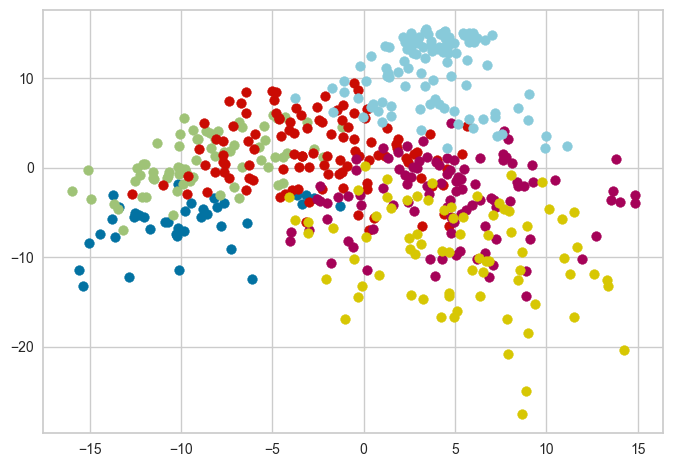

In [82]:
#plotting mnist
labels_mnist = model_mnist.predict(X_mnist)
unique_labels = np.unique(labels_2d)

for i in unique_labels:
    plt.scatter(X_flat[labels_mnist==i, 1] , X_flat[labels_mnist==i, 0])
plt.show()
#lots of data was lost while reducing dimmensions